In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('./data/data.xlsx', index_col=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2023-04-24 00시,236,251,253,254,265,279,261,279,140,183
1,2023-04-24 01시,211,190,164,192,184,241,208,243,126,138
2,2023-04-24 02시,145,161,115,200,152,184,151,173,83,94
3,2023-04-24 03시,162,170,105,185,119,152,196,141,59,86
4,2023-04-24 04시,200,299,151,47,181,289,362,207,135,169


In [3]:
input_volumes = pd.read_excel('./data/input_volume.xlsx', index_col=0)
input_volumes

,0_0,0_2,1_3,2_2,3_2,3_1,4_1,4_2
0,295,491,158,254,208,232,300,252
1,216,437,103,226,189,141,185,220
2,195,314,93,197,147,128,187,147
3,205,352,68,256,204,119,258,143
4,482,520,161,438,313,335,747,205
...,...,...,...,...,...,...,...,...
115,1435,2103,738,1313,1133,1080,1249,1479
116,1129,1850,673,1168,897,857,1096,1256
117,989,1627,527,1051,750,830,893,1033
118,875,1407,438,843,628,628,775,818


In [4]:
train_eT = np.array(data.iloc[56,1:].values)
train_eT

array([1005, 1553, 1180, 1682, 1911, 1424, 1628, 1494, 1084, 1454],
      dtype=object)

In [5]:
train_input = input_volumes.iloc[56,:].values
train_input

array([1549, 2560, 1157, 2065, 1801, 1514, 1842, 1211], dtype=int64)

In [6]:
from BRL import p_matrix, I_matrix
from optimizer4 import solve

In [8]:
solution = solve(e_T=train_eT)
solution

{8: 30,
 9: 5,
 10: 85,
 11: 86,
 12: 136,
 13: 280,
 14: 136,
 15: 249,
 17: 82,
 19: 76,
 20: 217,
 21: 414,
 22: 244,
 23: 239,
 24: 317,
 26: 8,
 28: 27,
 29: 280,
 30: 27,
 31: 251,
 32: 145,
 33: 148,
 35: 58,
 36: 64,
 38: 15,
 39: 136,
 40: 137,
 42: 59,
 43: 84,
 45: 62,
 46: 137,
 47: 137,
 49: 54,
 50: 237,
 51: 404,
 52: 171,
 53: 293,
 55: 78,
 56: 75,
 58: 54,
 59: 186,
 60: 405,
 61: 140,
 62: 293,
 64: 132,
 65: 69}

In [9]:
x = np.zeros(66)
for i in solution:
    x[i] = solution[i]
print(p_matrix@x)
print(train_eT)

[1007. 1547. 1172. 1565. 1914. 1503. 1619. 1472. 1076. 1443.]
[1005 1553 1180 1682 1911 1424 1628 1494 1084 1454]


In [11]:
from hyperopt import hp, fmin, tpe, Trials
def objective(args):
    w2, w3, w5, w6, w8, w9 = args
    solution = solve(e_T=train_eT, w2=int(w2), w3=int(w3), w5=int(w5), w6=int(w6), w8=int(w8), w9=int(w9))
    if bool(solution): # 해가 존재
        x = np.zeros(66)
        for i in solution:
            x[i] = solution[i]
        e = p_matrix @ x
        diff = np.linalg.norm(train_eT - e)
        return diff
    else: # 해가 존재하지 않음
        return np.Inf

space = [
    hp.quniform('w2', 1, 999, 1),
    hp.quniform('w3', 1, 999, 1),
    hp.quniform('w5', 1, 999, 1),
    hp.quniform('w6', 1, 999, 1),
    hp.quniform('w8', 1, 999, 1),
    hp.quniform('w9', 1, 999, 1),
]

results = []
for i in range(50):
    try:
        trials = Trials()
        result = fmin(
            fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10
        )
        
        results.append(result)
    except Exception as e:
        print(f"Iteration {i}: 에러가 발생했습니다. 다음 반복으로 이동합니다. 오류 내용: {e}")

100%|██████████| 10/10 [01:41<00:00, 10.15s/trial, best loss: 36.9729630946723]


In [12]:
results

[{'w2': 675.0, 'w3': 52.0, 'w5': 24.0, 'w6': 127.0, 'w8': 932.0, 'w9': 610.0},
 {'w2': 590.0, 'w3': 638.0, 'w5': 19.0, 'w6': 714.0, 'w8': 710.0, 'w9': 769.0},
 {'w2': 398.0,
  'w3': 752.0,
  'w5': 847.0,
  'w6': 277.0,
  'w8': 155.0,
  'w9': 993.0},
 {'w2': 646.0, 'w3': 77.0, 'w5': 268.0, 'w6': 406.0, 'w8': 554.0, 'w9': 888.0},
 {'w2': 691.0, 'w3': 422.0, 'w5': 643.0, 'w6': 18.0, 'w8': 606.0, 'w9': 372.0},
 {'w2': 889.0,
  'w3': 600.0,
  'w5': 733.0,
  'w6': 445.0,
  'w8': 804.0,
  'w9': 188.0},
 {'w2': 382.0, 'w3': 471.0, 'w5': 409.0, 'w6': 260.0, 'w8': 65.0, 'w9': 297.0},
 {'w2': 696.0, 'w3': 93.0, 'w5': 752.0, 'w6': 56.0, 'w8': 852.0, 'w9': 512.0},
 {'w2': 957.0,
  'w3': 301.0,
  'w5': 820.0,
  'w6': 461.0,
  'w8': 756.0,
  'w9': 445.0},
 {'w2': 699.0, 'w3': 367.0, 'w5': 202.0, 'w6': 475.0, 'w8': 732.0, 'w9': 78.0},
 {'w2': 357.0,
  'w3': 756.0,
  'w5': 398.0,
  'w6': 132.0,
  'w8': 307.0,
  'w9': 955.0},
 {'w2': 256.0,
  'w3': 724.0,
  'w5': 861.0,
  'w6': 519.0,
  'w8': 971.0,
  '

In [14]:
errors = []
for result in results:
    solution = solve(e_T=train_eT, w2=int(result['w2']), w3=int(result['w3']), w5=int(result['w5']),\
        w6=int(result['w6']), w8=int(result['w8']), w9=int(result['w9']))
    x = np.zeros(66)
    for i in solution:
        x[i] = solution[i]
    e = p_matrix @ x
    errors.append(np.linalg.norm(train_eT - e))

In [16]:
errors

[46.8081189538738,
 50.28916384272063,
 49.26459174701441,
 61.48170459575759,
 93.04300081145277,
 35.76310948449533,
 59.64059020499378,
 68.45436436049933,
 48.507731342539614,
 55.00909015790027,
 50.90186637049765,
 70.0,
 49.39635614091387,
 65.77993615077473,
 63.80438856379708,
 48.41487374764082,
 44.35087372307337,
 46.0,
 98.8736567544662,
 181.96153439669604,
 32.92415526630866,
 63.047601064592456,
 34.249087579087416,
 82.68010643437755,
 98.75221516502808,
 63.4428877022476,
 51.76871642217914,
 35.45419580247167,
 55.02726596879042,
 98.85342685005918,
 82.83115355951527,
 43.347433603386484,
 113.85956261992227,
 50.60632371551998,
 97.70363350459388,
 63.50590523722971,
 66.9552089086428,
 51.38093031466052,
 70.37755323965163,
 79.5989949685296,
 53.150729063673246,
 40.80441152620633,
 67.56478372643548,
 36.24913792078372,
 69.18814927427962,
 74.48489779814429,
 44.22668877499196,
 33.896902513356586,
 34.48187929913333,
 50.57667446560717]

In [19]:
import pickle
with open('errors.pickle', 'wb') as f:
    pickle.dump(errors, f)

In [24]:
outliers = [i for i in errors if i > 160]
for outlier in outliers:
    print(f"Error : {outlier}, Parameter : {results[errors.index(outlier)]}")

Error : 187.74450724322136, Parameter : {'lambda2': 0, 'w2': 650.0, 'w3': 727.0, 'w5': 852.0, 'w6': 810.0, 'w8': 703.0, 'w9': 568.0}
Error : 197.06344156134085, Parameter : {'lambda2': 0, 'w2': 218.0, 'w3': 812.0, 'w5': 399.0, 'w6': 929.0, 'w8': 507.0, 'w9': 692.0}
Error : 171.37969541342989, Parameter : {'lambda2': 0, 'w2': 463.0, 'w3': 930.0, 'w5': 868.0, 'w6': 144.0, 'w8': 646.0, 'w9': 571.0}
Error : 182.2333668678708, Parameter : {'lambda2': 0, 'w2': 319.0, 'w3': 754.0, 'w5': 664.0, 'w6': 863.0, 'w8': 927.0, 'w9': 632.0}
Error : 171.9447585708852, Parameter : {'lambda2': 0, 'w2': 328.0, 'w3': 895.0, 'w5': 491.0, 'w6': 261.0, 'w8': 58.0, 'w9': 399.0}


In [17]:
errors.index(min(errors))

20

In [18]:
print(errors[errors.index(min(errors))], results[errors.index(min(errors))])

32.92415526630866 {'w2': 596.0, 'w3': 92.0, 'w5': 694.0, 'w6': 913.0, 'w8': 238.0, 'w9': 379.0}


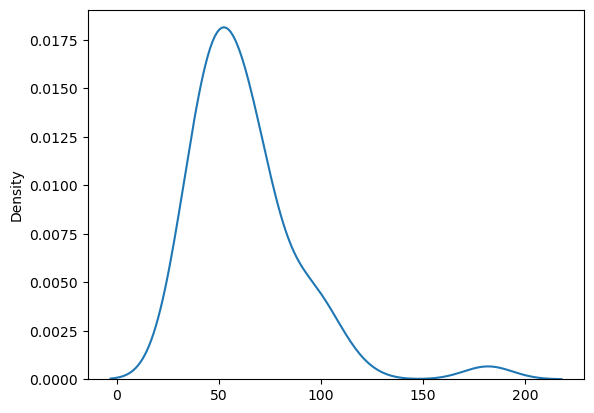

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(errors)
plt.show()

In [20]:
solution = solve(e_T=train_eT, w2=824, w3=159, w5=362, w6=95, w8=364, w9=63)
x = np.zeros(66)
for i in solution:
    x[i] = solution[i]
e = p_matrix@x
print(e)
print(train_eT)

TypeError: solve() got an unexpected keyword argument 'lambda2'

In [ ]:
I_matrix@x

array([   0., 1745., 1167.,    0., 1796., 1501., 1582., 1166.])